# **Страхование автомобилей**

Предположим, страховая компания в целях прогнозирования своей работы хочет узнать информацию о возникновении страхового случая у клиента, наступит он или нет. Источник данных: https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd             
import seaborn as sns           
import sklearn

### **1. Чтение данных**

In [2]:
url = "https://raw.githubusercontent.com/dasha-ludina/m1_machine-learning/main/Car_Insurance_Claim.csv"
data = pd.read_csv(url)

Таблица содержит данные о 10000 клиентов страховой компании, включает такую информацию, как время возраст, уровень образования, водительский стаж и т.д.

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному клиенту) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [3]:
data.shape

(10000, 19)

Метод data.head() отображает первые строки (по умолчанию, 5 строк) таблицы

In [4]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Так же можно вывести последние строки (по умолчанию, 5 строк) таблицы

In [5]:
data.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


Имена столбцов (признаков) можно получить таким образом:

In [6]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

Мы видим, что столбцы (признаки) имеют имена


*   ID - индентификатор клиента
*   AGE - возраст 
*   GENDER - пол 
*   RACE - стиль вождения
*   DRIVING_EXPERIENCE - стаж вождения
*   EDUCATION - образование
*   INCOME - уровень дохода
*   CREDIT_SCORE - кредитный рейтинг
*   VEHICLE_OWNERSHIP - владение автомобилем
*   VEHICLE_YEAR - год выпуска автомобиля
*   MARRIED - семейное положение
*   CHILDREN - наличие детей
*   POSTAL_CODE - почтовый индекс
*   ANNUAL_MILEAGE - годовой пробег автомобиля
*   VEHICLE_TYPE - тип автомобиля
*   SPEEDING_VIOLATIONS - количество штрафов
*   DUIS - вождение в нетрезвом виде
*   PAST_ACCIDENTS - число аварий
*   OUTCOME - исход

    Это будут наши классы данных, с которыми мы будем работать:
    * 0 - не требуется страховая выплата
    * 1 - требуется страховая выплата

Требуется предсказать бинарный категориальный признак OUTCOME по остальным признакам. Это задача классификации.

Выведем тип данных всех столбцов, представленных в таблице:

In [7]:
data.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

Столбцы, имеющие тип 'Object' содержат категориальные значения. Приведём их к специальному типу, предназначенному для хранения категориальных значений.

In [8]:
data['AGE'] = data['AGE'].astype('category')
data['GENDER'] = data['GENDER'].astype('category')
data['RACE'] = data['RACE'].astype('category')
data['DRIVING_EXPERIENCE'] = data['DRIVING_EXPERIENCE'].astype('category')
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['INCOME'] = data['INCOME'].astype('category')
data['VEHICLE_YEAR'] = data['VEHICLE_YEAR'].astype('category')
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].astype('category')

Изменим тип данных бинарных признаков(в том числе целевой), на bool, чтобы при рассмотрении статистики и визуализации они не входили в обзор вместе с количественными. После этого преобразования соответствующие им столбцы будут иметь значения True или False.

In [9]:
data["VEHICLE_OWNERSHIP"] = data["VEHICLE_OWNERSHIP"].astype('bool')
data["MARRIED"] = data["MARRIED"].astype('bool')
data["CHILDREN"] = data["CHILDREN"].astype('bool')
data["OUTCOME"] = data["OUTCOME"].astype('bool')

In [10]:
data.dtypes

ID                        int64
AGE                    category
GENDER                 category
RACE                   category
DRIVING_EXPERIENCE     category
EDUCATION              category
INCOME                 category
CREDIT_SCORE            float64
VEHICLE_OWNERSHIP          bool
VEHICLE_YEAR           category
MARRIED                    bool
CHILDREN                   bool
POSTAL_CODE               int64
ANNUAL_MILEAGE          float64
VEHICLE_TYPE           category
SPEEDING_VIOLATIONS       int64
DUIS                      int64
PAST_ACCIDENTS            int64
OUTCOME                    bool
dtype: object

### **2. Визуализация данных и вычисление основных характеристик**
Сводную информацию о признаках можем получить, вызвав метод describe, показывающий количество значений, средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

In [11]:
data.describe()

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


Из этих данных можно сделать вывод, что большинство обратившихся в страховую компанию ранее не имели зафикированных превышений скорости, не попадали в страховые случаи и не были замечены в вождении в нетрезвом виде.

По умолчанию этот метод дает информацию только о количественных признаках. Получим информацию о категориальных, а именно количество значений, количество уникальных значений, самое распространенные значение и частота наиболее распространенного значения.

In [12]:
data.describe(include=['category'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Получим информацию о бинарных признаках:

In [13]:
data.describe(include=['bool'])

,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,OUTCOME
count,10000,10000,10000,10000
unique,2,2,2,2
top,True,False,True,False
freq,6970,5018,6888,6867


Выведем некоторые пары признаков для визуализации их связи:

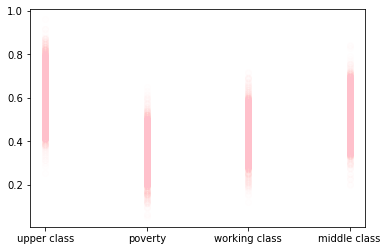

In [14]:
plt.scatter(data['INCOME'], data['CREDIT_SCORE'], alpha=0.01, color = 'pink')
pass

Данная диаграмма рассеивания показывает, что на кредитный рейтинг клиента страховой компании напрямую влияет его доход. Мы имеем не так много признаков, которые имеют большой набор различных значений, поэтому в нашем случае диаграмма рассеивания не лучший вариант визуализации данных.

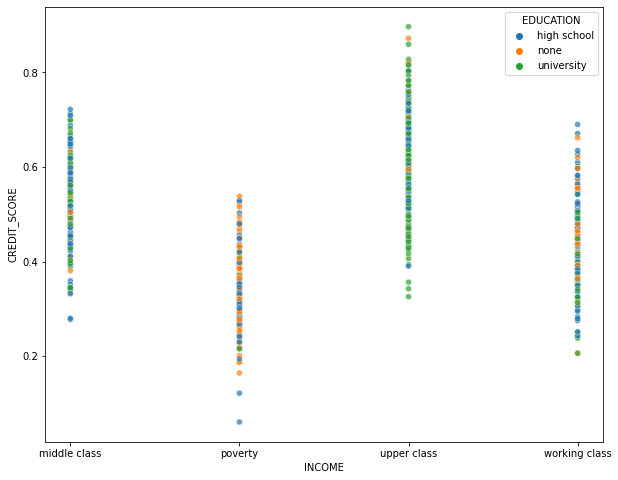

In [15]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.figure(figsize = (10, 8))
sns.scatterplot(x='INCOME', y='CREDIT_SCORE', hue='EDUCATION', data=data.iloc[random_subset], alpha=0.7)
pass

Это аналогичная предыдущей диаграмма рассеивания, отличие только в том, что она имеет дополнительную информацию о уровне образования клиентов.

Следующая гистограмма показывает распределений значений кредитного рейтинга водителей.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


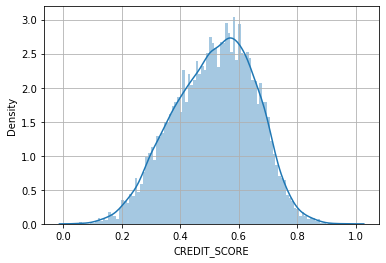

In [16]:
sns.distplot(data['CREDIT_SCORE'], bins=100)
plt.grid()
pass

Данная гистограмма показывает распределений количества штрафов водителей.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


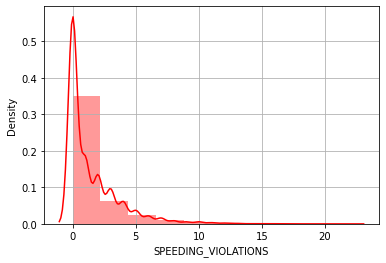

In [17]:
sns.distplot(data['SPEEDING_VIOLATIONS'], bins=10, color = 'red')
plt.grid()
pass

Рассмотрим возрастные категории клиентов

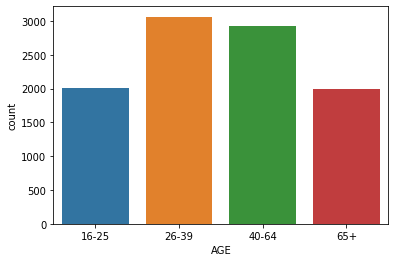

In [18]:
sns.countplot(x='AGE', data=data)
pass

Посмотрим, какой тип автомобиля преобладает у клиентов

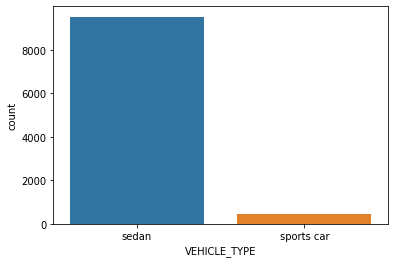

In [19]:
sns.countplot(x='VEHICLE_TYPE', data=data)
pass

**Ящик с усами**

Помогает проанализировать значения годового пробега автомобилей водителей различных возрастных категорий. Он отображает значения квартильные значения признака ANNUAL_MILEAGE, медианные значения, а также диапазоны значений для разных категорий.

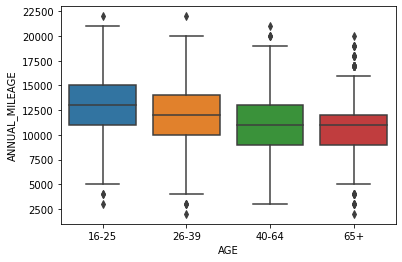

In [20]:
sns.boxplot(x='AGE', y='ANNUAL_MILEAGE', data=data)
pass

**Скрипичный график**

Скрипичные графики отображают графики аппроксимации плотности вероятности для тех же величин.

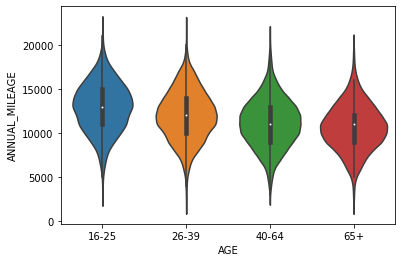

In [21]:
sns.violinplot(x='AGE', y='ANNUAL_MILEAGE', data=data)
pass

**Корреляционная матрица**

Построим матрицу корреляции:

In [22]:
corr_mat = data.corr()
corr_mat

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


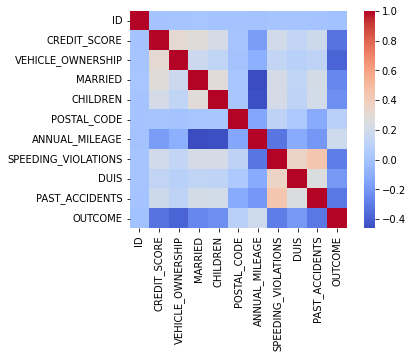

In [23]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Можно увидеть достаточно заметную взаимную корреляцию между превышением скорости, вождением в нетрезвом виде и числом аварий.

### **3. Обработка пропущенных значений**
Найдем столбцы, в которых имеются пропущенные значения и количество таких значений:

In [24]:
data.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Числовые признаки "CREDIT_SCORE" и "ANNUAL_MILEAGE" имеют пропущенные значения,заполним их медианой

In [25]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

<ipython-input-25-663ec0539a74>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(axis = 0), axis=0 , inplace=True)


ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Видно, что пропущенных значений не осталось

In [26]:
data.describe()

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.516718,19864.548400,11726.000000,1.482900,0.23920,1.056300
std,290030.768758,0.130781,18915.613855,2681.649329,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.431509,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.607607,32765.000000,13000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


### **4. Обработка категориальных признаков**

Для последующей нормализации признаков, закодируем категориальные признаки с помощью числовых.

Бинарные признаки "GENDER", "RACE", "VEHICLE_YEAR", "VEHICLE_TYPE" заменим на числовые (0 и 1).

In [27]:
data['GENDER'] = pd.factorize(data['GENDER'])[0]
data['RACE'] = pd.factorize(data['RACE'])[0]
data['VEHICLE_YEAR'] = pd.factorize(data['VEHICLE_YEAR'])[0]
data['VEHICLE_TYPE'] = pd.factorize(data['VEHICLE_TYPE'])[0]

К небинарным признакам "AGE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME" применим метод бинаризации.

In [28]:
AGE_dummies = pd.get_dummies(data['AGE'])
AGE_dummies.head()

,16-25,26-39,40-64,65+
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


In [29]:
DRIVING_EXPERIENCE_dummies = pd.get_dummies(data['DRIVING_EXPERIENCE'])
DRIVING_EXPERIENCE_dummies.head()

,0-9y,10-19y,20-29y,30y+
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


In [30]:
EDUCATION_dummies = pd.get_dummies(data['EDUCATION'])
EDUCATION_dummies.head()

,high school,none,university
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0


In [31]:
INCOME_dummies = pd.get_dummies(data['INCOME'])
INCOME_dummies.head()

,middle class,poverty,upper class,working class
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


Добавим dummy-столбцы к таблице и удалим "AGE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME":

In [32]:
data = pd.concat((data, AGE_dummies), axis=1)
data = pd.concat((data, DRIVING_EXPERIENCE_dummies), axis=1)
data = pd.concat((data, EDUCATION_dummies), axis=1)
data = pd.concat((data, INCOME_dummies), axis=1)

data = data.drop(['AGE'], axis=1)
data = data.drop(['DRIVING_EXPERIENCE'], axis=1)
data = data.drop(['EDUCATION'], axis=1)
data = data.drop(['INCOME'], axis=1)
data.head()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,10-19y,20-29y,30y+,high school,none,university,middle class,poverty,upper class,working class
0,569520,0,0,0.629027,True,0,False,True,10238,12000.0,...,0,0,0,1,0,0,0,0,1,0
1,750365,1,0,0.357757,False,1,False,False,10238,16000.0,...,0,0,0,0,1,0,0,1,0,0
2,199901,0,0,0.493146,True,1,False,False,10238,11000.0,...,0,0,0,1,0,0,0,0,0,1
3,478866,1,0,0.206013,True,1,False,True,32765,11000.0,...,0,0,0,0,0,1,0,0,0,1
4,731664,1,0,0.388366,True,1,False,False,32765,12000.0,...,1,0,0,0,1,0,0,0,0,1


### **5. Нормализация признаков**

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

Выполним стандартизацию всех признаков:

In [33]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

data_stand.describe()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,10-19y,20-29y,30y+,high school,none,university,middle class,poverty,upper class,working class
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.278977e-17,-6.963319e-17,1.101341e-17,-2.799538e-16,1.106670e-16,-9.947598e-18,5.826450e-17,4.174439e-17,1.350031e-17,1.243450e-17,...,-4.511946e-17,2.842171e-18,1.847411e-17,2.646772e-17,-3.073097e-17,-8.988366e-17,-2.131628e-17,-4.192202e-17,1.030287e-17,2.593481e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.725406e+00,-9.979521e-01,-3.310901e-01,-3.543027e+00,-1.516608e+00,-1.515532e+00,-9.963566e-01,-1.487665e+00,-5.089208e-01,-3.626872e+00,...,-7.016162e-01,-5.185052e-01,-3.428650e-01,-8.434325e-01,-4.866566e-01,-8.042631e-01,-5.214535e-01,-4.707183e-01,-8.749058e-01,-4.544701e-01
25%,-8.650234e-01,-9.979521e-01,-3.310901e-01,-6.515381e-01,-1.516608e+00,-1.515532e+00,-9.963566e-01,-1.487665e+00,-5.089208e-01,-6.436337e-01,...,-7.016162e-01,-5.185052e-01,-3.428650e-01,-8.434325e-01,-4.866566e-01,-8.042631e-01,-5.214535e-01,-4.707183e-01,-8.749058e-01,-4.544701e-01
50%,4.327448e-03,-9.979521e-01,-3.310901e-01,6.357612e-02,6.593002e-01,6.597685e-01,-9.963566e-01,6.721273e-01,-5.089208e-01,1.021759e-01,...,-7.016162e-01,-5.185052e-01,-3.428650e-01,-8.434325e-01,-4.866566e-01,-8.042631e-01,-5.214535e-01,-4.707183e-01,-8.749058e-01,-4.544701e-01
75%,8.738817e-01,1.001952e+00,-3.310901e-01,6.949655e-01,6.593002e-01,6.597685e-01,1.003556e+00,6.721273e-01,6.820002e-01,4.750808e-01,...,1.425138e+00,-5.185052e-01,-3.428650e-01,1.185513e+00,-4.866566e-01,1.243250e+00,-5.214535e-01,-4.707183e-01,1.142866e+00,-4.544701e-01
max,1.722073e+00,1.001952e+00,3.020024e+00,3.395757e+00,6.593002e-01,6.597685e-01,1.003556e+00,6.721273e-01,3.818880e+00,3.831224e+00,...,1.425138e+00,1.928428e+00,2.916308e+00,1.185513e+00,2.054631e+00,1.243250e+00,1.917525e+00,2.124201e+00,1.142866e+00,2.200145e+00


### **6. Разбиение данных на обучающуюю и тестовую выборки**

Для предсказания признака "OUTCOME" будем использовать все входные признаки, кроме "ID":

In [34]:
X = data_stand.drop(["ID", "OUTCOME"], axis=1)
y = data["OUTCOME"]

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(7500, 2500)

### **7. Метод k-ближайших соседей**

Запустим классификатор с количеством соседей k = 1, 3, 5, 10, 15, 20 и вычислим точность:

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_1= KNeighborsClassifier(n_neighbors = 1)
knn_1.fit(X_train, y_train)
knn_1train = knn_1.score(X_train, y_train)
knn_1test = knn_1.score(X_test, y_test)
print("Accuracy\n01:train: {:.2f}% \n01:test:  {:.2f}%".format(knn_1train*100, knn_1test*100))

Accuracy
01:train: 99.97% 
01:test:  78.04%


In [37]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)
knn_3train = knn_3.score(X_train, y_train)
knn_3test = knn_3.score(X_test, y_test)
print("Accuracy\n03:train: {:.2f}% \n03:test:  {:.2f}%".format(knn_3train*100, knn_3test*100))

Accuracy
03:train: 88.72% 
03:test:  79.60%


In [38]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(X_train, y_train)
knn_5train = knn_5.score(X_train, y_train)
knn_5test = knn_5.score(X_test, y_test)
print("Accuracy\n05:train: {:.2f}% \n05:test:  {:.2f}%".format(knn_5train*100, knn_5test*100))

Accuracy
05:train: 86.71% 
05:test:  80.16%


In [39]:
knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(X_train, y_train)
knn_10train = knn_10.score(X_train, y_train)
knn_10test = knn_10.score(X_test, y_test)
print("Accuracy\n10:train: {:.2f}% \n10:test:  {:.2f}%".format(knn_10train*100, knn_10test*100))

Accuracy
10:train: 84.75% 
10:test:  81.72%


In [40]:
knn_15 = KNeighborsClassifier(n_neighbors = 15)
knn_15.fit(X_train, y_train)
knn_15train = knn_15.score(X_train, y_train)
knn_15test = knn_15.score(X_test, y_test)
print("Accuracy\n15:train: {:.2f}% \n15:test:  {:.2f}%".format(knn_15train*100, knn_15test*100))

Accuracy
15:train: 83.93% 
15:test:  82.04%


In [41]:
knn_20 = KNeighborsClassifier(n_neighbors = 20)
knn_20.fit(X_train, y_train)
knn_20train = knn_20.score(X_train, y_train)
knn_20test = knn_20.score(X_test, y_test)
print("Accuracy\n20:train: {:.2f}% \n20:test:  {:.2f}%".format(knn_20train*100, knn_20test*100))

Accuracy
20:train: 83.47% 
20:test:  81.72%


Посмотрим confusion matrix для лучшей по точности модели из 20 соседей:

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn_20.predict(X_test))

array([[1549,  174],
       [ 283,  494]])

### **Вывод**

В наступлении страхового случая доля случайности велика и предсказать наверняка, наступит такой случай или нет невозможно. Это объясняет достаточно высокий процент ошибок(~18%) при самом оптимальном параметре. Кроме того, возможно, при составлении таблицы автор учел не все влияющие на исход признаки. Возможно улучшить результати поможет использованние другого классификатора или расширение числа признаков.

### **9. Метод Random Forest**

In [43]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)
print("Accuracy\nrf:train: {:.2f}% \nrf:test:  {:.2f}%".format(rf_train*100, rf_test*100))

Accuracy
rf:train: 99.97% 
rf:test:  82.92%


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf.predict(X_test))

array([[1547,  176],
       [ 251,  526]])

По результатам видно, что при применение метода Random Forest ошибки на тестовой и обучающей выборках сильно разняться. И в данном случае лучше использовать метод kNN.

### **10. Общие выводы**

В результате проделанной работы была решена задача классификации с помощью метода К-ближайших соседей и метода Random Forest, а также была выполнена визуализация и вычисление основных характеристик, обработка пропущенных значений, обработка категориальных признаков, нормализация признаков, разбиение данных на тестовую и обучающую выборки. На основе проделанной работы можно сказать, что наиболее важным является не повышение общей точности, а правильность предсказания. Эта задача не является простой, очень велик случайный фактор, а все данные, которые есть у страховой не в полной мере влияют на исход. Отсюда достаточно большой процент ошибки в методах kNN и Random Forest.

# **Обучение сети**

**Обучение классификатора**



In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

В качестве алгоритма оптимизации выберем алгоритм Adam. Активационная функция - Relu. Один скрытый слой, с количеством нейронов 100:

In [46]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,),
                          solver='adam',
                          activation='relu',
                          random_state=42,
                          max_iter=1000)

In [47]:
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [48]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибки на обучающей и тестовой выборках:

In [49]:
print("train error: " + str(np.mean(y_train != y_train_pred)), "test error: " + str(np.mean(y_test != y_test_pred)))
print(str(mlp_model.score(X_train, y_train)), str(mlp_model.score(X_test, y_test)))
print("test error: " + str(1 - mlp_model.score(X_test, y_test)))
print("train error: " + str(1 - mlp_model.score(X_train, y_train)))

train error: 0.06733333333333333 test error: 0.1924
0.9326666666666666 0.8076
test error: 0.19240000000000002
train error: 0.06733333333333336


Подберем оптимальное значение параметра регуляризации alpha

In [50]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha,
                              hidden_layer_sizes=(100,),
                              solver='adam',
                              activation='relu',
                              max_iter=1000, 
                              random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

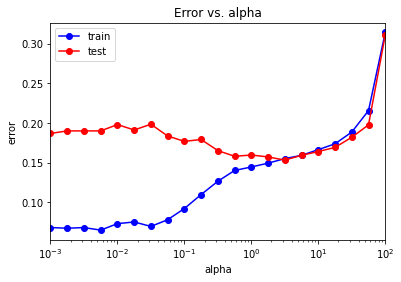

In [51]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

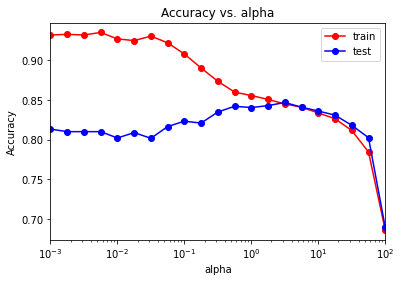

In [52]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальные значения ошибки:

In [53]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальное значение ошибки на обучающей выборке: ")
print(min_train_err)

print("Минимальное значение ошибки на тестовой выборке: " )
print(min_test_err)

Минимальное значение ошибки на обучающей выборке: 
0.06493333333333333
Минимальное значение ошибки на тестовой выборке: 
0.1532


Оптимальное значение alpha:

In [54]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

3.1622776601683795


Посмотрим на результат обучения при оптимальном alpha

In [55]:
mlp_model = MLPClassifier(alpha = alpha_opt, 
                          hidden_layer_sizes=(100,), 
                          solver='adam',
                          activation='relu',
                          max_iter=1000, 
                          random_state = 42)

mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.15506666666666666
0.1532


Подберем оптимальное значение количества нейронов при оптимальном alpha

In [56]:
neuron_arr = np.linspace(10, 500, 20).astype(int)
test_error = []
train_error = []
test_acc = []
train_acc = []

for neuron in neuron_arr:
  mlp_model = MLPClassifier(alpha=alpha_opt,
                            hidden_layer_sizes=(neuron,), 
                            solver='adam',
                            activation='relu',
                            max_iter=1000, 
                            random_state = 42)
  
  mlp_model.fit(X_train, y_train)

  y_train_pred = mlp_model.predict(X_train)
  y_test_pred = mlp_model.predict(X_test)

  test_error.append(np.mean(y_test != y_test_pred))
  train_error.append(np.mean(y_train != y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))
  train_acc.append(accuracy_score(y_train, y_train_pred))

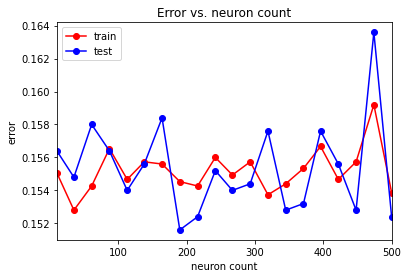

In [57]:
plt.plot(neuron_arr, train_error, 'r-o', label='train')
plt.plot(neuron_arr, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Error vs. neuron count')
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

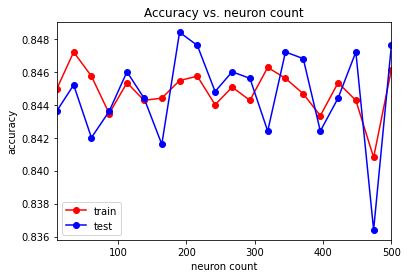

In [58]:
plt.plot(neuron_arr, train_acc, 'r-o', label='train')
plt.plot(neuron_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Accuracy vs. neuron count')
plt.xlabel('neuron count')
plt.ylabel('accuracy')
plt.legend()

In [59]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальное значение ошибки на обучающей выборке: ")
print(min_train_err)

print("Минимальное значение ошибки на тестовой выборке: " )
print(min_test_err)

Минимальное значение ошибки на обучающей выборке: 
0.06493333333333333
Минимальное значение ошибки на тестовой выборке: 
0.1532


In [60]:
neuron_opt = neuron_arr[test_error == min_test_err]
neuron_opt = neuron_opt[0]
print(neuron_opt)

371


Посмотрим на результат обучения при оптимальном кол-ве нейронов и оптимальном alpha



In [61]:
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes = (neuron_opt,),
                          solver='adam',
                          activation='relu',
                          max_iter=1000, 
                          random_state = 42)

mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающей выборке: " + str(np.mean(y_train != y_train_pred)))
print("Ошибка на тестовой выборке: " + str(np.mean(y_test != y_test_pred)))

Ошибка на обучающей выборке: 0.15533333333333332
Ошибка на тестовой выборке: 0.1532


In [62]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.8446666666666667
0.8468


In [63]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[1543  203]
 [ 180  574]]


## **Выводы**

На основе полученных эксперементов можно сделать следующие выводы:

1. Оптимальные результаты были достигнуты при alpha = 3.1622776601683795 и числе нейронов = 371.
2. C ростом коэффициента регуляризации растет ошибка и падает accuracy. Это говорит о том, что после обучения у модели не возникает больших значений весовых коэффициентов, а значит нет переобучения.
3. Показатели ошибок всё ещё достаточно большие, это связано со сложностью исследуемой модели. При найденных оптимальных значениях параметров они лучше, чем показатели ошибок в методе ближайших соседей.